# Algerian Forest Fire ML_Linear_Regression Practical Implementation

# Life cycle of Machine learning Project
a)Understanding the Problem Statement 

b)Data Collection

c)Data Cleaning

d)Exploratory data analysis

e)Data Pre-Processing

f)Model Training

g)Choose best model


# 1) Problem statement.
a)The dataset Comprises of two regions of Algeria, namely the Bejaia region located in the northeast of Algeria and the Sidi Bel-abbes region located in the northwest of Algeria.

b)If User can Predict the Temperature Based on Different- Different Features.

c)Prediction result can be used for Forest Fire Situation Tackers & Make Correct Preventions to Avoid it in future.

# 2) Data Collection.
a)The Dataset is collected from Website named, UCI Machine Learning Repository.  

b)The data consists of 15 columns and 244 rows.

In [176]:
#importing required libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline


In [6]:
df = pd.read_csv('Algerian_forest_fires_dataset_UPDATE.csv',header = 1)
#loading Csv data as dataframe

In [7]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


In [9]:
#showing top 5 rows
df.head()


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


# 3) DATA Cleaning

In [10]:
#Removing Unnecessary Rows From Dataset

In [11]:
df.drop(index=[122,123], inplace=True) 
df.reset_index(inplace=True)
df.drop('index', axis=1, inplace=True)

In [12]:
#Adding New Feature, named 'Region' in a Dataset

In [13]:
df.loc[:122, 'region'] = 'bejaia'
df.loc[122:, 'region'] = 'Sidi-Bel Abbes'

In [14]:
# Stripping the names of the columns

df.columns = [i.strip() for i in df.columns]
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'region'],
      dtype='object')

In [15]:
# Stripping the Classes Features data

df.Classes = df.Classes.str.strip()
df['Classes'].unique()

array(['not fire', 'fire', nan], dtype=object)

In [16]:
df['Classes'].dtype

dtype('O')

In [17]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,bejaia
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,bejaia
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,bejaia
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,bejaia
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,bejaia


# Changing The DataTypes of the Columns

In [18]:
df['day']=df['day'].astype(int)
df['month']=df['month'].astype(int)
df['year']=df['year'].astype(int)
df['Temperature']=df['Temperature'].astype(int)
df['RH']=df['RH'].astype(int)
df['Ws']=df['Ws'].astype(float)
df['Rain']=df['Rain'].astype(float)
df['FFMC']=df['FFMC'].astype(float)
df['DMC']=df['DMC'].astype(float)
df['ISI']=df['ISI'].astype(float)
df['BUI']=df['BUI'].astype(float)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int32  
 1   month        244 non-null    int32  
 2   year         244 non-null    int32  
 3   Temperature  244 non-null    int32  
 4   RH           244 non-null    int32  
 5   Ws           244 non-null    float64
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    object 
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          244 non-null    object 
 13  Classes      243 non-null    object 
 14  region       244 non-null    object 
dtypes: float64(6), int32(5), object(4)
memory usage: 24.0+ KB


In [19]:
## Adding New Feature,named 'Date' by Replacing Unnecessary feature like 'day','month','year'.

df['date'] = pd.to_datetime(df[['day','month','year']])
df.drop(['day', 'month', 'year'], axis=1, inplace=True)

In [20]:
## Showing Updated Dataset after Modification Done.
df

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region,date
0,29,57,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,bejaia,2012-06-01
1,29,61,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,bejaia,2012-06-02
2,26,82,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,bejaia,2012-06-03
3,25,89,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0,not fire,bejaia,2012-06-04
4,27,77,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,bejaia,2012-06-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,30,65,14.0,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,Sidi-Bel Abbes,2012-09-26
240,28,87,15.0,4.4,41.1,6.5,8,0.1,6.2,0,not fire,Sidi-Bel Abbes,2012-09-27
241,27,87,29.0,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,Sidi-Bel Abbes,2012-09-28
242,24,54,18.0,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,Sidi-Bel Abbes,2012-09-29


# 4) EXPLORING DATA

# 4.1) Profile of the Data

In [22]:
# getting shape and size
df.shape

(244, 13)

# Observation :-

In this Dataset there are 13 Columns & 244 Rows

In [23]:
df.columns

Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'FWI', 'Classes', 'region', 'date'],
      dtype='object')

In [24]:
## Check if Missing Value Present or Not in Dataset.
df.isnull().sum()

Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        1
region         0
date           0
dtype: int64

# Observations:-

We Got one Null Value in 'Classes' Feature

In [25]:
## Unique Value of Classes feature

df['Classes'].unique()

array(['not fire', 'fire', nan], dtype=object)

In [26]:
## Handling Categorical Feature Classes

df['Classes']=df['Classes'].map({'not fire':0,'fire':1})
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region,date
0,29,57,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0.0,bejaia,2012-06-01
1,29,61,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0.0,bejaia,2012-06-02
2,26,82,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0.0,bejaia,2012-06-03
3,25,89,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0,0.0,bejaia,2012-06-04
4,27,77,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0.0,bejaia,2012-06-05


In [27]:
# Focus on Replacing Null Value
# The best Way of Replacing Null Value by using mode

df['Classes'].mode() [0]   

1.0

In [28]:
df['Classes']=df['Classes'].fillna(df['Classes'].mode()[0])

In [29]:
df.isnull().sum()

Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
region         0
date           0
dtype: int64

# Observations :-

Now We have Zero Null Value in dataset

In [30]:
df['Classes'].unique()

array([0., 1.])

In [31]:
# Check Null & getting feature datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Temperature  244 non-null    int32         
 1   RH           244 non-null    int32         
 2   Ws           244 non-null    float64       
 3   Rain         244 non-null    float64       
 4   FFMC         244 non-null    float64       
 5   DMC          244 non-null    float64       
 6   DC           244 non-null    object        
 7   ISI          244 non-null    float64       
 8   BUI          244 non-null    float64       
 9   FWI          244 non-null    object        
 10  Classes      244 non-null    float64       
 11  region       244 non-null    object        
 12  date         244 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(7), int32(2), object(3)
memory usage: 23.0+ KB


# Observations

1)There is total 244 rows and 13 columns.

2)There are No Null Value in Dataset.

3)There is total 4 data types float64, int64, object and datetime64.

4)Dtypes Included float64 = 7 Columns, int64 = 2 Columns, object = 3 Columns and datetime64 = 1.

5)Total Memory Usage is 23.0+ KB.

In [32]:
## Checking the usage of the memory by the dataset

df.memory_usage()

Index           128
Temperature     976
RH              976
Ws             1952
Rain           1952
FFMC           1952
DMC            1952
DC             1952
ISI            1952
BUI            1952
FWI            1952
Classes        1952
region         1952
date           1952
dtype: int64

# 4.1.1 Numerical and Categorical Columns

# Numerical Dataset

In [33]:
# 1. Getting Numerical features from dataset 
# 2. Creating Numerical dataframe
numerical_features = [feature for feature in df.columns if df[feature].dtype != 'O']

# Print Numerical Features
print('We have {} numerical features : {}'.format(len(numerical_features), numerical_features))

We have 10 numerical features : ['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'ISI', 'BUI', 'Classes', 'date']


# Categorical Dataset

In [34]:
# 1. Getting Categorical features from dataset 
# 2. Creating Categorical dataframe
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('\n We have {} categorical features : {}'.format(len(categorical_features), categorical_features))


 We have 3 categorical features : ['DC', 'FWI', 'region']


# 4.1.2 Feature Information

In [35]:
df.head(2)


,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region,date
0,29,57,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0.0,bejaia,2012-06-01
1,29,61,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0.0,bejaia,2012-06-02


# Weather data observations:-

a)Temperature : temperature noon (temperature max) in Celsius degrees: 22 to 42

b)RH : Relative Humidity in %: 21 to 90

c)Ws :Wind speed in km/h: 6 to 29

d)Rain: total day in mm: 0 to 16.8

# FWI Components

a)(FFMC) Fine Fuel Moisture Code index from the FWI system: 28.6 to 92.5

b)(DMC) Duff Moisture Code index from the FWI system: 1.1 to 65.9

c)(DC) Drought Code index from the FWI system: 7 to 220.4

d)(ISI) Initial Spread Index from the FWI system: 0 to 18.5

e)(BUI) Buildup Index from the FWI system: 1.1 to 6
8
g)(FWI) Fire Weather Index: 0 to 31.1


h)Classes: two classes, namely Fire and not Fire.


i)Region: Two Regions, namely Bejaia Region indicated with 0 and Sidi Bel-Abbes Region indicated with 1.

# DATE Observations (DD/MM/YYYY) :-

Date :- Date Displayed in (DD/MM/YYYY) format in dataset


# Univariate Analysis

The term univariate analysis refers to the analysis of one variable prefix “uni” means “one.” The purpose of univariate analysis is to understand the distribution of values for a single variable.

In [36]:
df.var()

Temperature     13.204817
RH             221.539415
Ws               7.897102
Rain             3.997623
FFMC           205.565939
DMC            152.968382
ISI             17.433281
BUI            201.777024
Classes          0.246711
dtype: float64

# Numerical Features Analysis

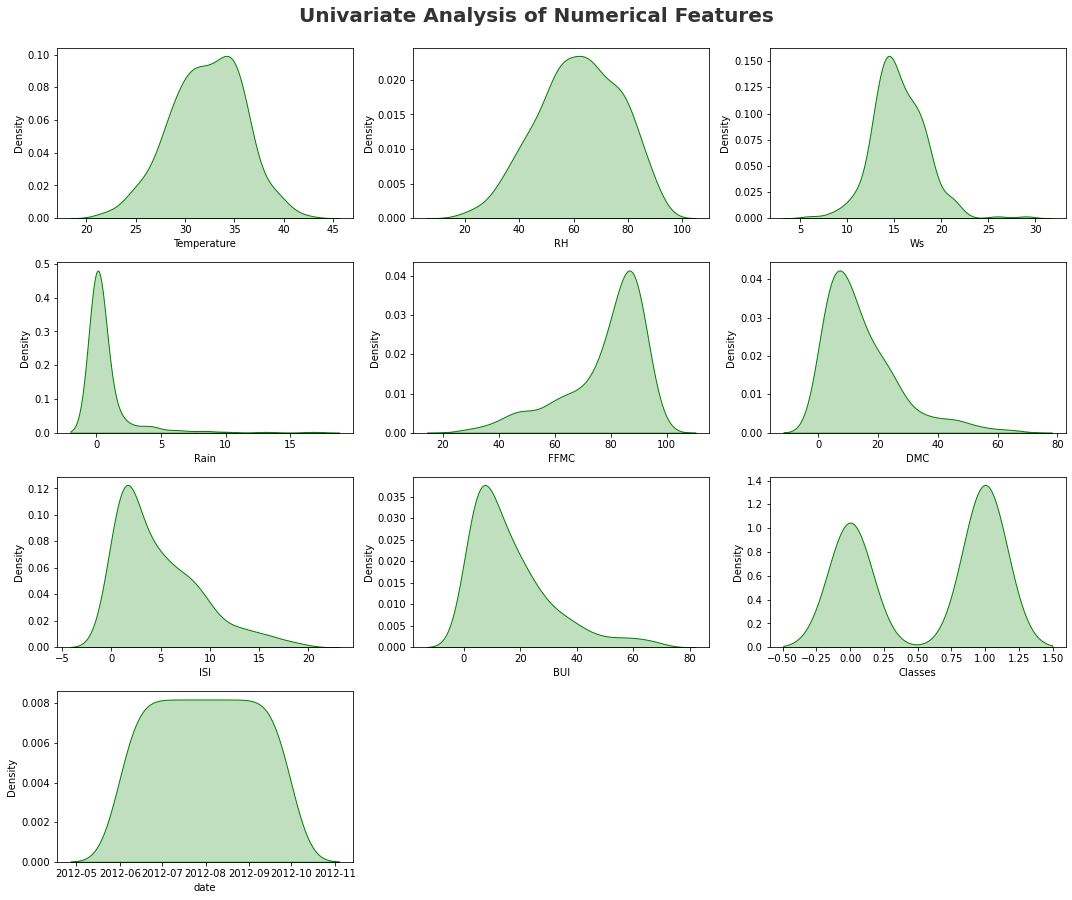

In [37]:
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numerical_features)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=df[numerical_features[i]],shade=True, color='g')
    plt.xlabel(numerical_features[i])
    plt.tight_layout()

# Observations

a)Rain,ISI,BUI,DMC are right skewed and postively skewed.

b)FFMC is a Left skewed and Negetively skewed.

c)Outliers in Rain, ISI, BUI, DMC and FFMC.

# Scatter plot to see the trends in each numerical column

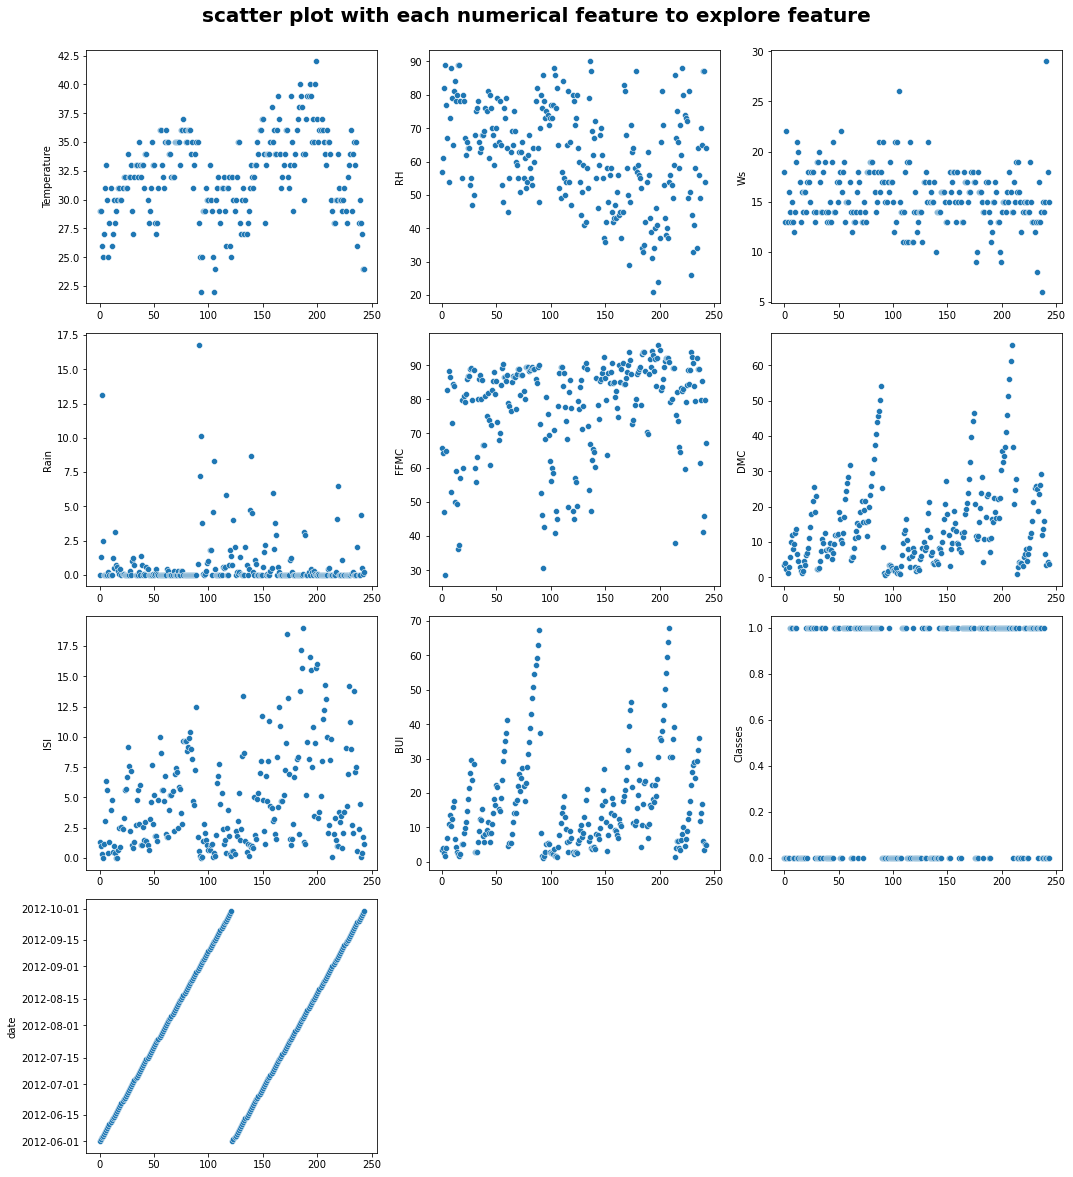

In [38]:
# scatter plot to see the trends in each numerical column

plt.figure(figsize=(15, 20))
plt.suptitle('scatter plot with each numerical feature to explore feature', fontsize=20, fontweight='bold', alpha=1, y=1)

for i in range(0, len(numerical_features)):
    plt.subplot(5, 3, i+1)
    sns.scatterplot(y=numerical_features[i], x=df.index, data=df)
    plt.tight_layout()

# Categorical Features Analysis

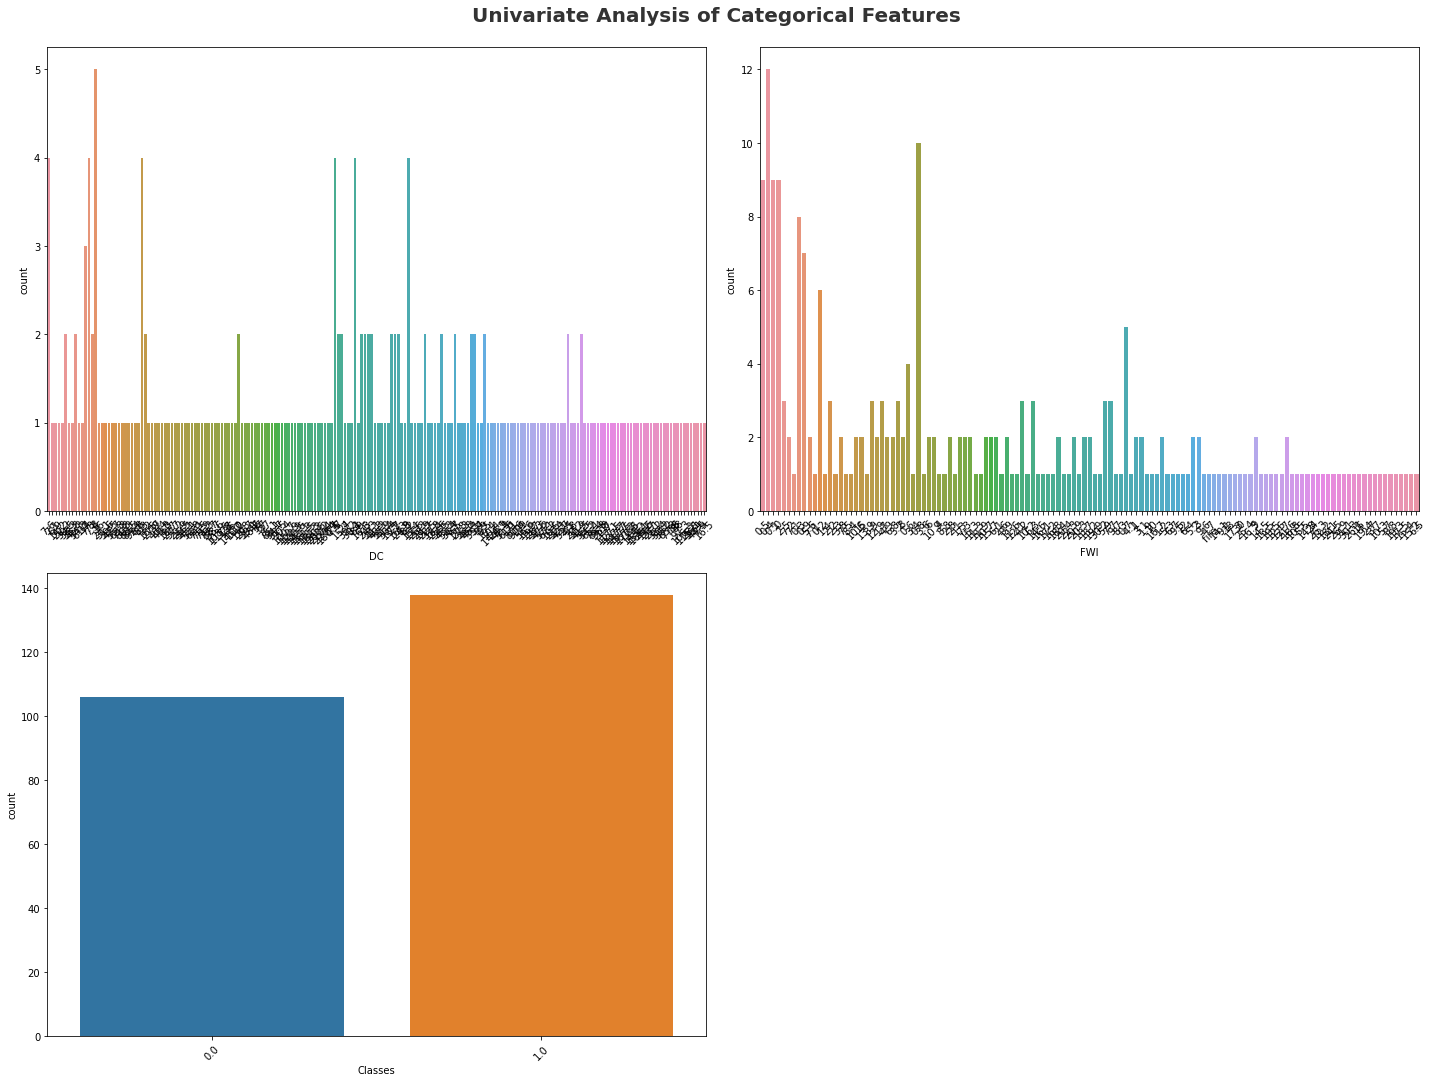

In [39]:
# categorical columns Analysis

plt.figure(figsize=(20, 15))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
cat1 = ['DC', 'FWI', 'Classes']
for i in range(0, len(cat1)):
    plt.subplot(2, 2, i+1)
    sns.countplot(x=df[cat1[i]])
    plt.xlabel(cat1[i])
    plt.xticks(rotation=45)
    plt.tight_layout()
    

# observation -

a)Extreme value of Temperature is above 40. 

b)Most of the time RH is above 30.

c)WS values lie between 10 to 20.

# Bivariate analysis and multivariate analysis

In [40]:
# stripplot (categorical vs numerical)
# scatterplot / pairplot (numerical vs numerical) (check correlation)
# boxplot (outlies)
# heatmap (correlation)
# lineplot (trend in numerical feature with time)

# Multicolleniarity in numerical features

In [41]:
df.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,BUI,Classes
Temperature,1.000000,-0.654443,-0.278132,-0.326786,0.677491,0.483105,0.607551,0.455504,0.518119
RH,-0.654443,1.000000,0.236084,0.222968,-0.645658,-0.405133,-0.690637,-0.348587,-0.435023
Ws,-0.278132,0.236084,1.000000,0.170169,-0.163255,-0.001246,0.015248,0.029756,-0.066529
Rain,-0.326786,0.222968,0.170169,1.000000,-0.544045,-0.288548,-0.347105,-0.299171,-0.379449
FFMC,0.677491,-0.645658,-0.163255,-0.544045,1.000000,0.602391,0.739730,0.589652,0.770114
DMC,0.483105,-0.405133,-0.001246,-0.288548,0.602391,1.000000,0.674499,0.982073,0.584188
ISI,0.607551,-0.690637,0.015248,-0.347105,0.739730,0.674499,1.000000,0.635891,0.735511
BUI,0.455504,-0.348587,0.029756,-0.299171,0.589652,0.982073,0.635891,1.000000,0.583882
Classes,0.518119,-0.435023,-0.066529,-0.379449,0.770114,0.584188,0.735511,0.583882,1.000000


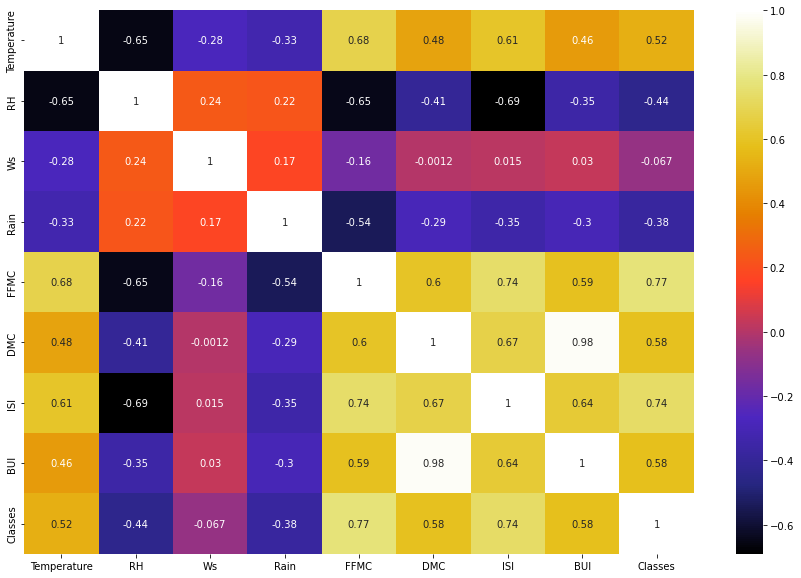

In [42]:
## Plotting Heatmap

plt.figure(figsize = (15,10))
sns.heatmap(df.corr(), cmap="CMRmap", annot=True)
plt.show()

# Observation :-

a)Highly +ve correlated features are DMC and BUI

b)Highly -ve correlated features are RH and Temp, RH and FFMC, RH and ISI



# Strip plot to see the relationship between numerical features and target

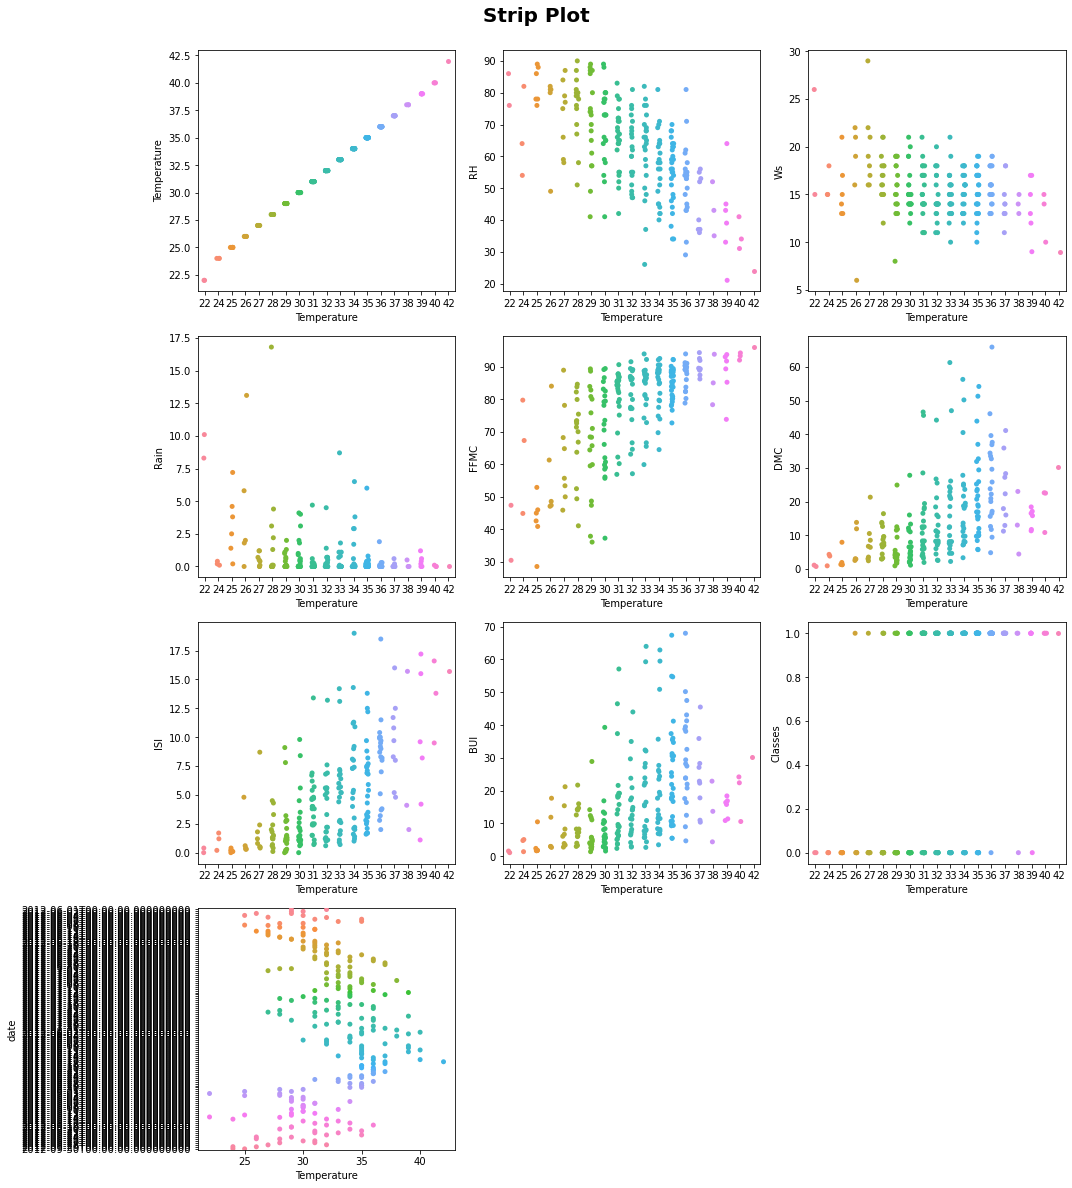

In [43]:
# strip plot to see the relationship between numerical features and target
## Targeted Feature is "Temperature"


plt.figure(figsize=(15, 20))
plt.suptitle('Strip Plot', fontsize=20, fontweight='bold', alpha=1, y=1)

for i in range(0, len(numerical_features)):
    plt.subplot(5, 3, i+1)
    sns.stripplot(y=numerical_features[i], x='Temperature', data=df)
    plt.tight_layout()

# observation -

Note :- Here Targeted Feature is "Temperature"

a)places with higher 'RH' has Lower 'Temperature'.

b)places with lower 'WS' has higher 'Temperature'.

c)places with FFMC > 80 has higher 'Temperature'.

d)places wiht ISI > 15.0 has higher 'Temperature'.


# Boxplot to find Outliers in the features

<AxesSubplot:>

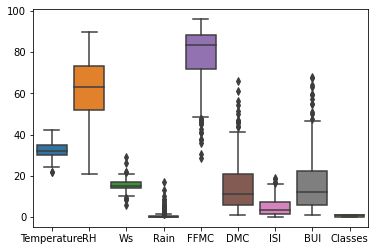

In [44]:
## Boxplot to find Outliers in the features
sns.boxplot(data = df,orient="v")

# Observation:-

RH, Rain, FFMC, DMC BUI has many outliers

# 4.2 ) Statistical Analysis

In [45]:
# Display summary statistics for a dataframe
df.describe()

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,BUI,Classes
count,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000
mean,32.172131,61.938525,15.504098,0.760656,77.887705,14.673361,4.774180,16.664754,0.565574
std,3.633843,14.884200,2.810178,1.999406,14.337571,12.368039,4.175318,14.204824,0.496700
min,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,0.000000,1.100000,0.000000
25%,30.000000,52.000000,14.000000,0.000000,72.075000,5.800000,1.400000,6.000000,0.000000
50%,32.000000,63.000000,15.000000,0.000000,83.500000,11.300000,3.500000,12.250000,1.000000
75%,35.000000,73.250000,17.000000,0.500000,88.300000,20.750000,7.300000,22.525000,1.000000
max,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,19.000000,68.000000,1.000000


# Observation

a)df.describe() return all Statistics Summary of Numeric Columns. 

b)Its Return function like:- count(), mean(), std(), min(), 25%(), 50%(), 75%(), max().

# 4.3) Graphical Analysis
Which area has most of the time High Temperatures ?

<AxesSubplot:xlabel='region', ylabel='Temperature'>

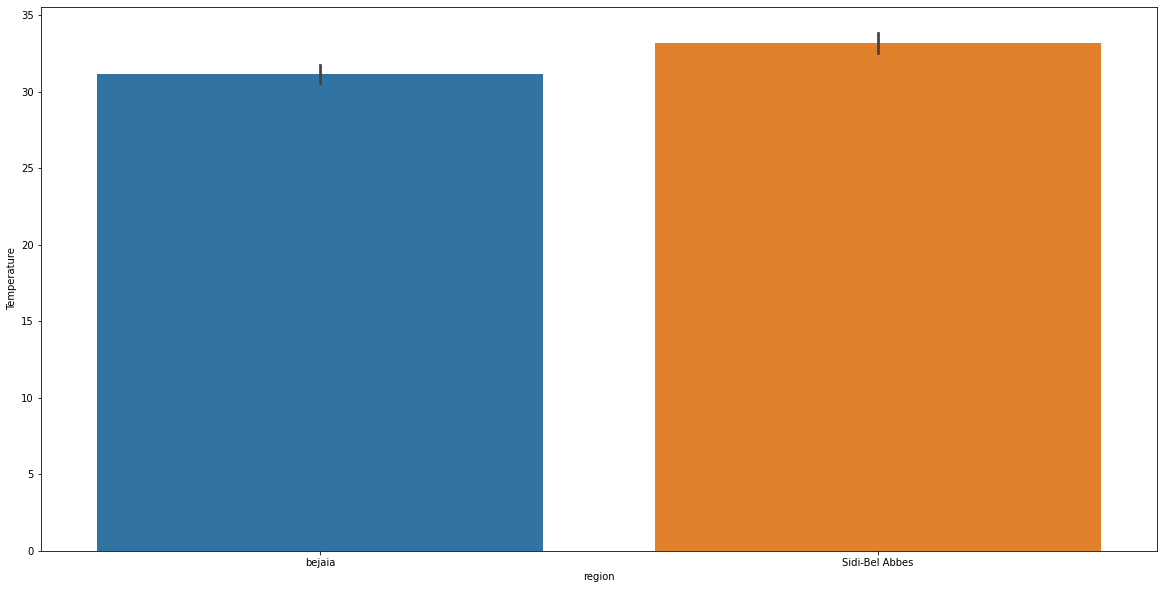

In [47]:
#Which area has most of the time High Temperatures ?
import matplotlib
matplotlib.rcParams['figure.figsize']=(20,10)

sns.barplot(x="region",y="Temperature",data=df)

# Observation

Sidi-Bel-Abbes Region has Most of the Time has Higher Temperature.

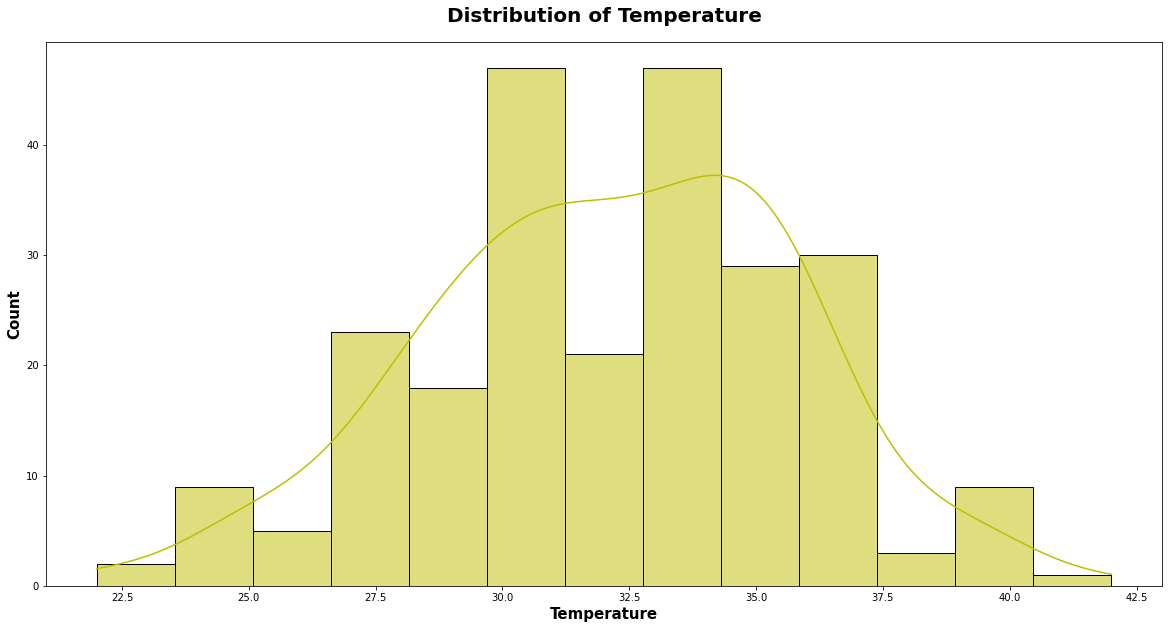

In [50]:
#Temperature Range which is in most of the places ?
plt.subplots(figsize=(20,10))
sns.histplot("Distribution of Temperature",x=df.Temperature,color='y',kde=True)
plt.title("Distribution of Temperature",weight='bold',fontsize=20,pad=20)
plt.xlabel("Temperature",weight='bold',fontsize=15)
plt.ylabel("Count",weight='bold',fontsize=15)
plt.show()

# Observation:-

Temperature occur most of the time in range 32.5 to 35.0

<AxesSubplot:xlabel='Temperature', ylabel='Classes'>

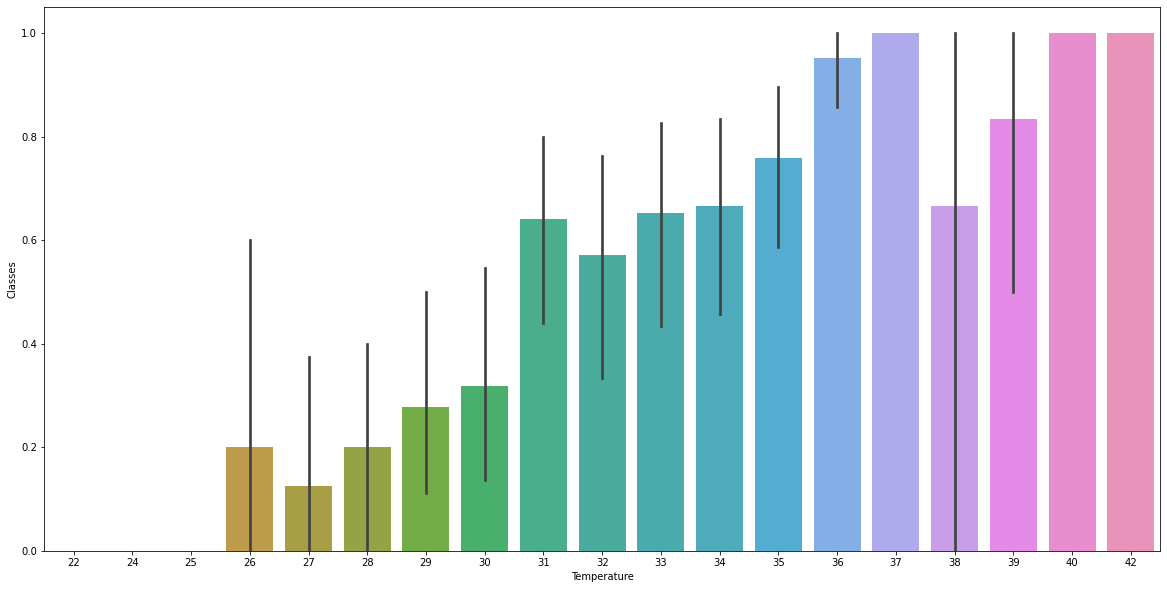

In [51]:
#Highest Temperature attained
import matplotlib
matplotlib.rcParams['figure.figsize']=(20,10)

sns.barplot( x="Temperature", y="Classes",data=df)

# Observation:-

Highest temperature is 42,40,37

<AxesSubplot:xlabel='Temperature', ylabel='Rain'>

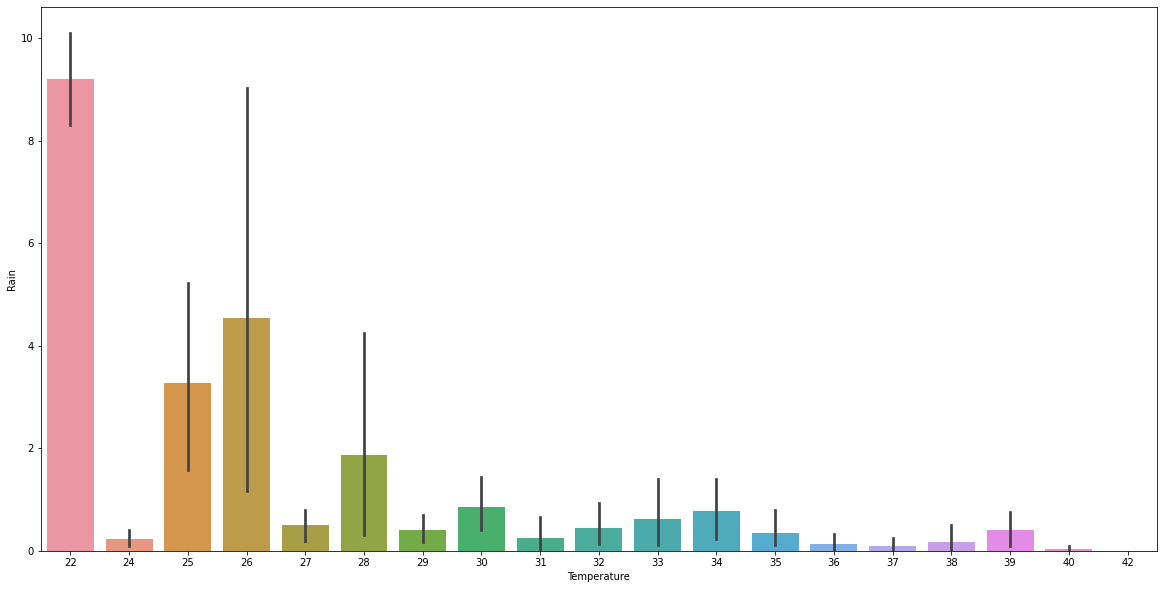

In [53]:
#What are most time rain happens in Respect with Temperature?

import matplotlib
matplotlib.rcParams['figure.figsize']=(20,10)

sns.barplot(x="Temperature",y="Rain",data=df)


# Observation

a)Where Rain is Higher , the Temperature is low. 

b)Where Rain is Low, the Temperature is high.

# Boxplot to find Outliers in the features

<AxesSubplot:>

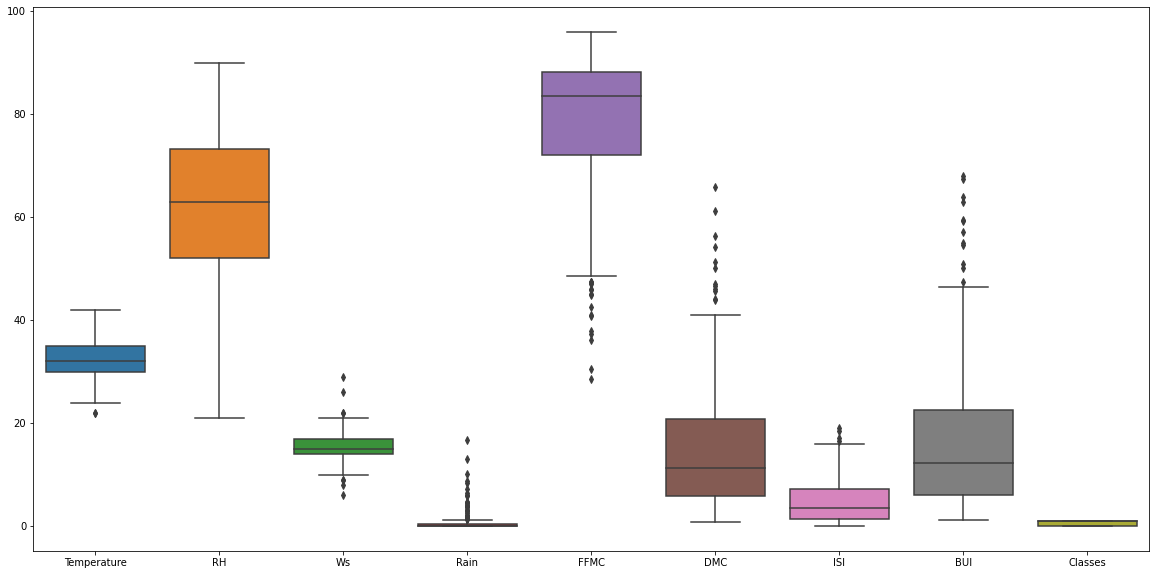

In [54]:
## Boxplot to find Outliers in the features
sns.boxplot(data = df,orient="v")

# Observation:-

Ws, Rain, FFMC, DMC BUI has many outliers


# Boxplot of Class Vs Temperature

<AxesSubplot:xlabel='Classes', ylabel='Temperature'>

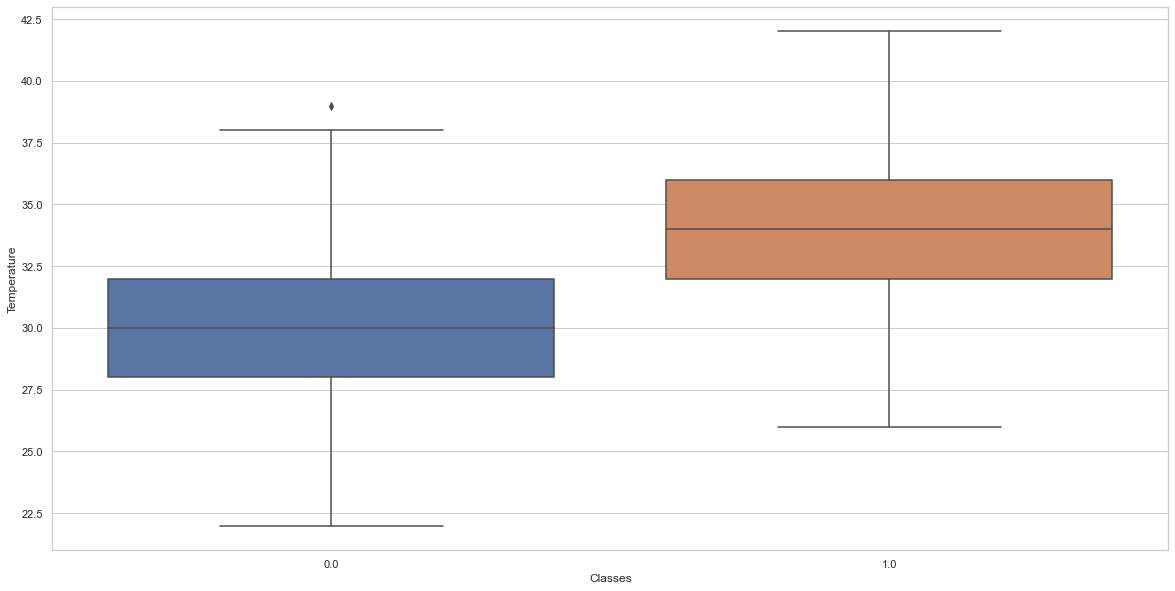

In [55]:
# Python program to illustrate
# boxplot using inbuilt data-set
# given in seaborn

# importing the required module
import seaborn

# use to set style of background of plot
seaborn.set(style="whitegrid")

# loading data-set

seaborn.boxplot(x ='Classes', y ='Temperature', data = df)

# Observations:-



# Note :- Here, Classes contain 0 = Fire, 1 = Not Fire.

One day at lower temperature fires occur


# Boxplot of Temperature Vs Rain

<AxesSubplot:xlabel='Temperature', ylabel='Rain'>

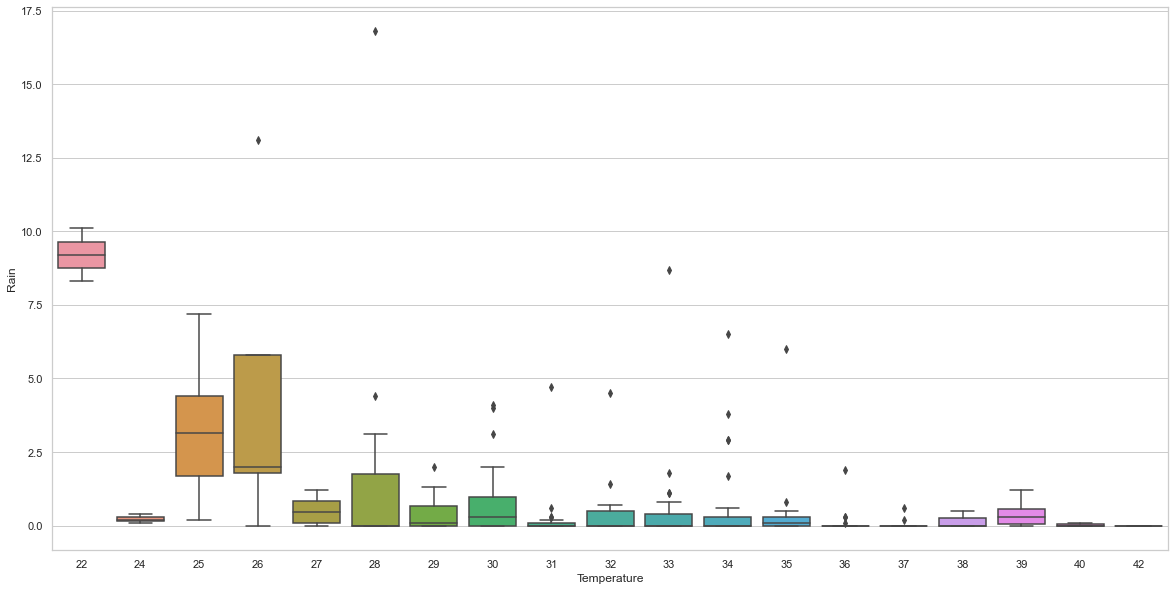

In [56]:
# Python program to illustrate
# boxplot using inbuilt data-set
# given in seaborn

# importing the required module
import seaborn

# use to set style of background of plot
seaborn.set(style="whitegrid")

# loading data-set

seaborn.boxplot(x ='Temperature', y ='Rain', data = df)

# Observation:-

a)Where Rain is Higher , the Temperature is low. 

b)Where Rain is Low, the Temperature is high.

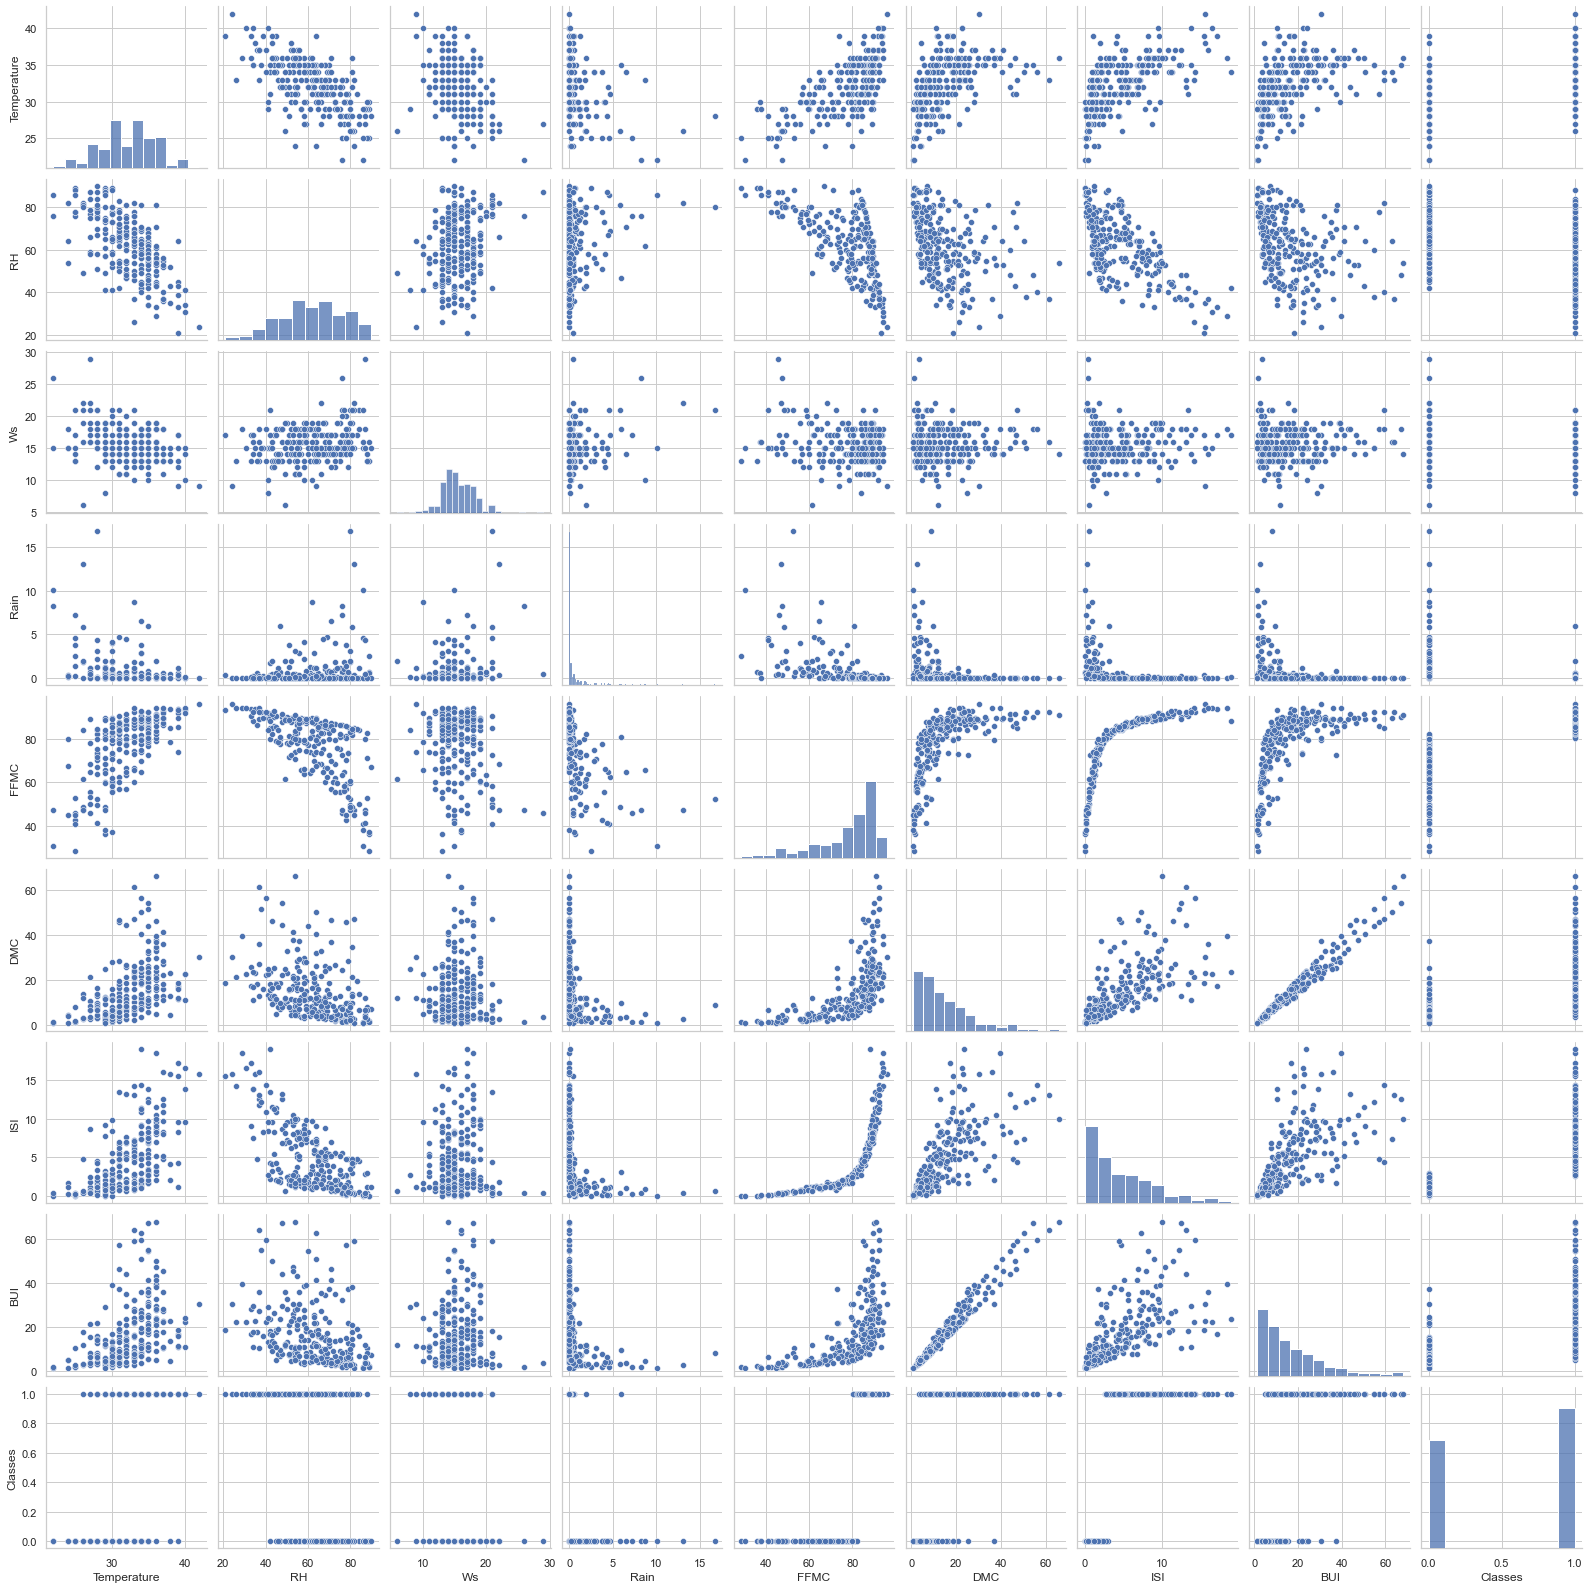

In [57]:
import seaborn as sns
sns.pairplot(df)

<AxesSubplot:>

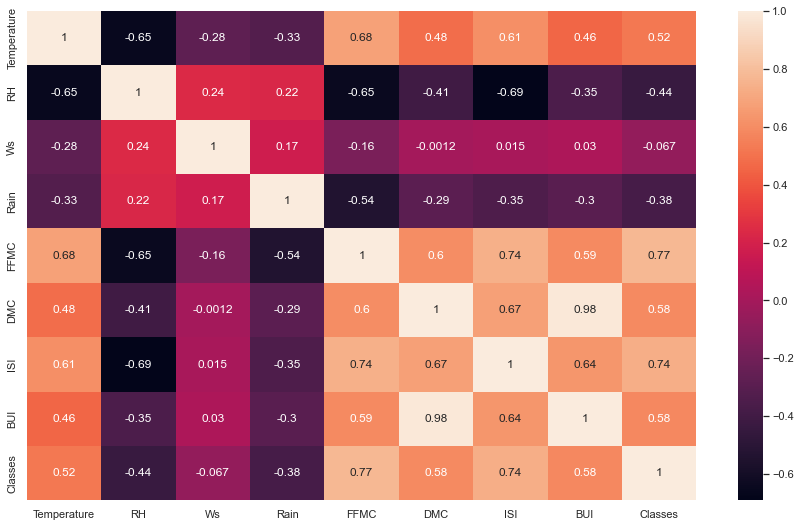

In [61]:
sns.set(rc = {'figure.figsize' : (15,9)})
sns.heatmap(df.corr(), annot = True)

Text(0, 0.5, 'Temperature')

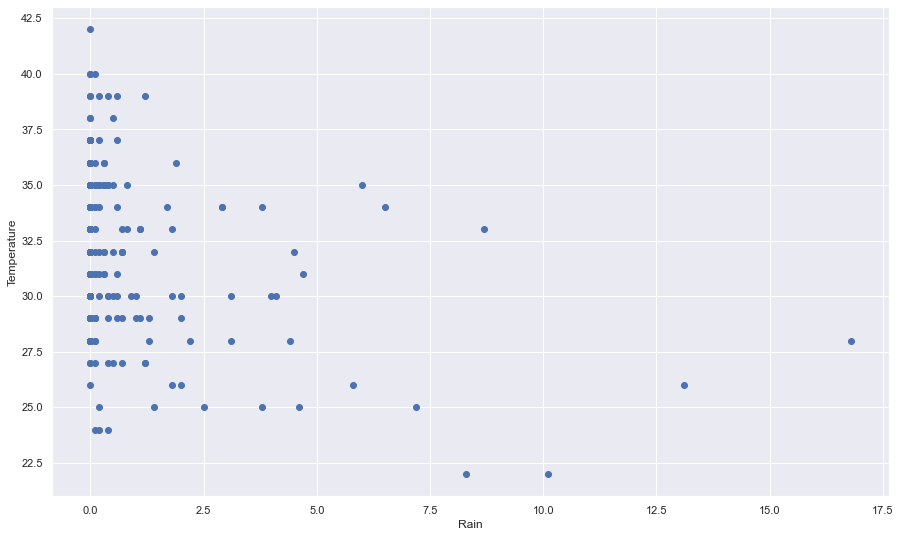

In [62]:
plt.scatter(df['Rain'],df['Temperature'])
plt.xlabel("Rain")
plt.ylabel("Temperature")

# Observation:-

a)Where Rain is Higher , the Temperature is low. 

b)Where Rain is Low, the Temperature is high.

<AxesSubplot:xlabel='RH', ylabel='Temperature'>

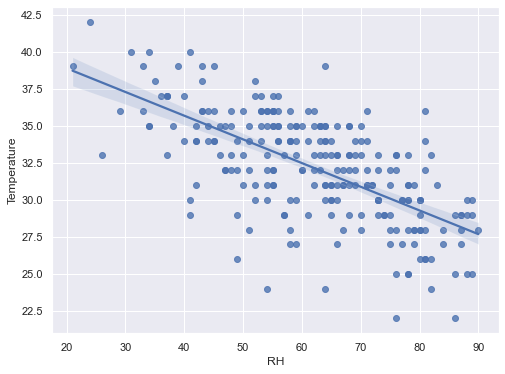

In [64]:
sns.set(rc={'figure.figsize':(8,6)})
sns.regplot(x = "RH", y = "Temperature", data = df)

<AxesSubplot:xlabel='FFMC', ylabel='Temperature'>

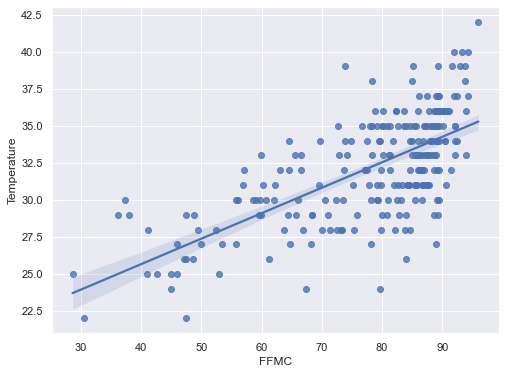

In [65]:
sns.set(rc={'figure.figsize':(8,6)})
sns.regplot(x="FFMC",y="Temperature",data=df)

<AxesSubplot:xlabel='Temperature'>

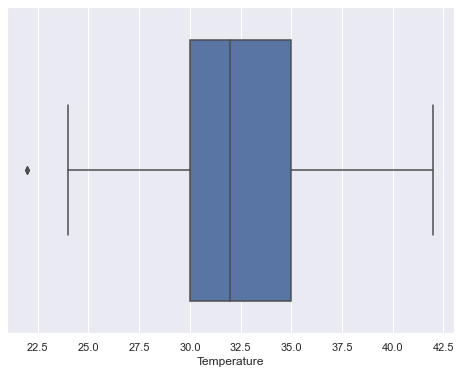

In [66]:
sns.boxplot(df['Temperature'])

<AxesSubplot:xlabel='Rain'>

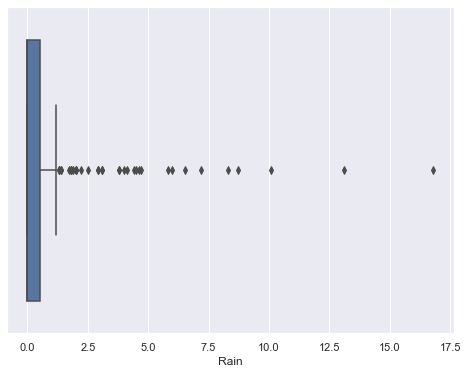

In [67]:
sns.boxplot(df['Rain'])

In [68]:
df.head(3)

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region,date
0,29,57,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0.0,bejaia,2012-06-01
1,29,61,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0.0,bejaia,2012-06-02
2,26,82,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0.0,bejaia,2012-06-03


# Data Cleaning for Better Model Prediction

In [69]:
#Converting Object Dtype to Float Dtype for Model Accuracy in X_train dataset

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Temperature  244 non-null    int32         
 1   RH           244 non-null    int32         
 2   Ws           244 non-null    float64       
 3   Rain         244 non-null    float64       
 4   FFMC         244 non-null    float64       
 5   DMC          244 non-null    float64       
 6   DC           244 non-null    object        
 7   ISI          244 non-null    float64       
 8   BUI          244 non-null    float64       
 9   FWI          244 non-null    object        
 10  Classes      244 non-null    float64       
 11  region       244 non-null    object        
 12  date         244 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(7), int32(2), object(3)
memory usage: 23.0+ KB


In [71]:
df['DC'].dtype 

dtype('O')

In [72]:
df['FWI'].dtype

dtype('O')

In [73]:
 ## In DC & FWI Feature there are many Object Dtype Available, after Observing ,I  Drop 'DC' & 'FWI' Feature from dataset.
df = df.drop(columns = ('DC'),  axis = 1)
df = df.drop(columns = ('FWI'),  axis = 1)

In [74]:
df

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,BUI,Classes,region,date
0,29,57,18.0,0.0,65.7,3.4,1.3,3.4,0.0,bejaia,2012-06-01
1,29,61,13.0,1.3,64.4,4.1,1.0,3.9,0.0,bejaia,2012-06-02
2,26,82,22.0,13.1,47.1,2.5,0.3,2.7,0.0,bejaia,2012-06-03
3,25,89,13.0,2.5,28.6,1.3,0.0,1.7,0.0,bejaia,2012-06-04
4,27,77,16.0,0.0,64.8,3.0,1.2,3.9,0.0,bejaia,2012-06-05
...,...,...,...,...,...,...,...,...,...,...,...
239,30,65,14.0,0.0,85.4,16.0,4.5,16.9,1.0,Sidi-Bel Abbes,2012-09-26
240,28,87,15.0,4.4,41.1,6.5,0.1,6.2,0.0,Sidi-Bel Abbes,2012-09-27
241,27,87,29.0,0.5,45.9,3.5,0.4,3.4,0.0,Sidi-Bel Abbes,2012-09-28
242,24,54,18.0,0.1,79.7,4.3,1.7,5.1,0.0,Sidi-Bel Abbes,2012-09-29


In [75]:
import numpy as np
df.info()  ## Now After Data Cleaning

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Temperature  244 non-null    int32         
 1   RH           244 non-null    int32         
 2   Ws           244 non-null    float64       
 3   Rain         244 non-null    float64       
 4   FFMC         244 non-null    float64       
 5   DMC          244 non-null    float64       
 6   ISI          244 non-null    float64       
 7   BUI          244 non-null    float64       
 8   Classes      244 non-null    float64       
 9   region       244 non-null    object        
 10  date         244 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(7), int32(2), object(1)
memory usage: 19.2+ KB


# Independent and Dependent Feature

In [76]:
## Independent and Dependent Feature

x = df.iloc[:, 1:-2]         ## x = All Other Numeric Features Except "Temperature" Feature
y = df.iloc[:,0]             ## y = Targeted feature "Temperature"

In [77]:
x

,RH,Ws,Rain,FFMC,DMC,ISI,BUI,Classes
0,57,18.0,0.0,65.7,3.4,1.3,3.4,0.0
1,61,13.0,1.3,64.4,4.1,1.0,3.9,0.0
2,82,22.0,13.1,47.1,2.5,0.3,2.7,0.0
3,89,13.0,2.5,28.6,1.3,0.0,1.7,0.0
4,77,16.0,0.0,64.8,3.0,1.2,3.9,0.0
...,...,...,...,...,...,...,...,...
239,65,14.0,0.0,85.4,16.0,4.5,16.9,1.0
240,87,15.0,4.4,41.1,6.5,0.1,6.2,0.0
241,87,29.0,0.5,45.9,3.5,0.4,3.4,0.0
242,54,18.0,0.1,79.7,4.3,1.7,5.1,0.0


In [78]:
y

0      29
1      29
2      26
3      25
4      27
       ..
239    30
240    28
241    27
242    24
243    24
Name: Temperature, Length: 244, dtype: int32

In [79]:
from sklearn.model_selection import train_test_split


In [80]:
X_train,X_test, Y_train, Y_test = train_test_split(x,y, test_size = 0.33, random_state =42)


In [81]:
X_train

,RH,Ws,Rain,FFMC,DMC,ISI,BUI,Classes
114,54,11.0,0.5,73.7,7.9,1.2,9.6,0.0
65,65,13.0,0.0,86.8,11.1,5.2,11.5,1.0
132,42,21.0,0.0,90.6,18.2,13.4,18.0,1.0
207,40,18.0,0.0,92.1,56.3,14.3,59.5,1.0
162,56,15.0,2.9,74.8,7.1,1.6,6.8,0.0
...,...,...,...,...,...,...,...,...
106,82,15.0,0.4,44.9,0.9,0.2,1.4,0.0
14,80,17.0,3.1,49.4,3.0,0.4,3.0,0.0
92,76,17.0,7.2,46.0,1.3,0.2,1.8,0.0
179,57,16.0,0.0,87.5,15.7,6.7,15.7,1.0


In [82]:
X_train.shape

(163, 8)

In [83]:
Y_train

114    32
65     34
132    31
207    34
162    34
       ..
106    24
14     28
92     25
179    33
102    30
Name: Temperature, Length: 163, dtype: int32

In [84]:
Y_train.shape

(163,)

In [85]:
X_test

,RH,Ws,Rain,FFMC,DMC,ISI,BUI,Classes
24,64,15.0,0.0,86.7,14.2,5.7,18.3,1.0
6,54,13.0,0.0,88.2,9.9,6.4,10.9,1.0
153,48,16.0,0.0,87.6,7.9,6.8,7.8,1.0
211,53,17.0,0.5,80.2,20.7,2.7,30.6,1.0
198,41,10.0,0.1,92.0,22.6,9.5,24.2,1.0
...,...,...,...,...,...,...,...,...
180,59,16.0,0.0,88.1,19.5,7.4,19.5,1.0
5,67,14.0,0.0,82.6,5.8,3.1,7.0,1.0
56,48,13.0,0.0,90.3,22.2,8.7,29.4,1.0
125,64,14.0,0.0,79.4,5.2,2.2,5.6,0.0


In [86]:
X_test.shape

(81, 8)

In [88]:
Y_test

24     31
6      33
153    33
211    35
198    40
       ..
180    34
5      31
56     36
125    30
148    36
Name: Temperature, Length: 81, dtype: int32

In [90]:
Y_test.shape

(81,)

# Standardize or Feature Scalling the Dataset

In [91]:
## Standardize or Feature Scalling the Dataset

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [92]:
scaler                                       
## Scaler is an Object , an Standard Scaler Objects

StandardScaler()

In [93]:
X_train = scaler.fit_transform(X_train)      
## Fit_transport means  Applying the Formula & Changing the data

In [94]:
X_test = scaler.transform(X_test)

In [95]:
X_train

array([[-0.60257784, -1.68484146, -0.17054229, ..., -0.80014076,
        -0.47763563, -1.04390785],
       [ 0.14460201, -0.93856657, -0.39436188, ...,  0.16132584,
        -0.3471914 ,  0.95793896],
       [-1.41768313,  2.04653297, -0.39436188, ...,  2.13233237,
         0.09906517,  0.95793896],
       ...,
       [ 0.89178186,  0.5539832 ,  2.82864022, ..., -1.04050741,
        -1.01314351, -1.04390785],
       [-0.39880152,  0.18084575, -0.39436188, ...,  0.52187581,
        -0.058841  ,  0.95793896],
       [ 0.9597073 ,  2.04653297,  0.41138865, ..., -0.82417743,
        -0.9719506 , -1.04390785]])

In [96]:
X_test

array([[ 0.07667657, -0.19229169, -0.39436188,  0.67685449, -0.03052244,
         0.28150916,  0.11966162,  0.95793896],
       [-0.60257784, -0.93856657, -0.39436188,  0.77931297, -0.37009673,
         0.44976582, -0.38838431,  0.95793896],
       [-1.01013048,  0.18084575, -0.39436188,  0.73832958, -0.52803826,
         0.54591248, -0.60121437,  0.95793896],
       [-0.67050328,  0.5539832 , -0.17054229,  0.23286778,  0.48278753,
        -0.43959079,  0.96411636,  0.95793896],
       [-1.48560857, -2.0579789 , -0.34959796,  1.03887443,  0.63283198,
         1.19490243,  0.52472528,  0.95793896],
       [ 0.07667657, -2.43111635,  0.14280514, -0.20428836, -0.22794936,
        -0.82417743, -0.35405689, -1.04390785],
       [-1.62145945, -0.19229169, -0.30483404,  0.85444918,  0.09583078,
         0.88242579, -0.05197552,  0.95793896],
       [ 1.16348363, -0.56542913,  0.50091648, -1.91876013, -0.97817163,
        -1.01647075, -0.95821962, -1.04390785],
       [ 1.09555819, -1.31170402

# Model Training


# Linear Regression Model Prediction

In [97]:
## Linear Regression
from sklearn.linear_model import LinearRegression
  

In [98]:
regression = LinearRegression()
regression


LinearRegression()

In [99]:
LinearRegression()


LinearRegression()

In [100]:
regression.fit(X_train, Y_train)

LinearRegression()

# Print the Coefficients and the intercept

In [101]:
## print the Coefficients
print(regression.coef_)

[-1.04543262 -0.47357018  0.10021995  1.82327758  0.12573135  0.17088561
  0.24335231 -0.26484938]


In [102]:
## print the intercept
print(regression.intercept_)

31.98159509202454


In [103]:
## Prediction for the Test data
reg_pred = regression.predict(X_test)

In [104]:
reg_pred

array([33.00674784, 34.11950967, 33.8855133 , 32.79419423, 36.52615796,
       32.71539397, 35.19161778, 27.33139756, 30.99796245, 29.58586948,
       29.42460255, 33.4274263 , 33.95352094, 33.48023065, 34.19311614,
       32.19700985, 36.97985439, 25.21750399, 32.26401384, 33.50420952,
       30.93833937, 28.3669283 , 34.99954884, 28.69083985, 36.52529739,
       26.82074265, 32.70997918, 33.27291072, 32.91903121, 34.58048311,
       34.51522327, 31.57661772, 32.62103567, 33.31912978, 32.71199731,
       33.38364766, 30.30169034, 34.25125238, 31.78783181, 23.79809099,
       33.47076807, 33.73980521, 32.48126685, 24.81636379, 36.06878401,
       32.43639042, 31.25547958, 30.55355193, 35.25600003, 34.59119977,
       36.96746325, 30.86723899, 31.05572071, 34.39878504, 33.69137609,
       32.28932331, 36.99087506, 32.36649978, 30.1224896 , 36.46783802,
       33.08294334, 30.02673524, 33.96201881, 32.01368053, 31.86600619,
       24.78309326, 33.14413455, 30.60056421, 36.77240924, 34.81

# Assumption of Linear Regression.

In [105]:
## Assumption of Linear Regression.

import seaborn as sns
import matplotlib.pyplot as plt

Text(0, 0.5, 'Test Predicted Data')

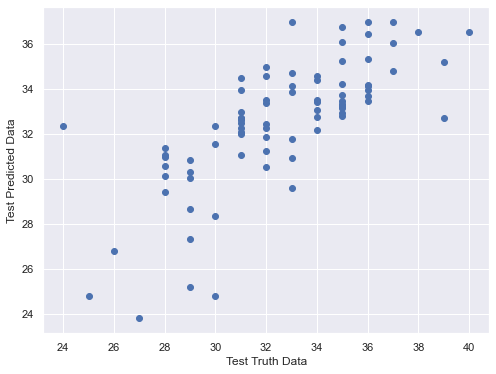

In [108]:
## Relationship Between Real Data & Predicted Data
plt.scatter(Y_test,reg_pred)          ## IF we get Linear Manner , it is good Linear Model.
plt.xlabel("Test Truth Data")
plt.ylabel("Test Predicted Data")      ## When we take Test data & Prediction data,then we have an linear distributions


In [109]:
## Calculating Residual
residuals = Y_test - reg_pred

In [115]:
residuals

24    -2.006748
6     -1.119510
153   -0.885513
211    2.205806
198    3.473842
         ...   
180    0.498044
5     -1.080813
56     0.667201
125   -2.359191
148    1.852486
Name: Temperature, Length: 81, dtype: float64

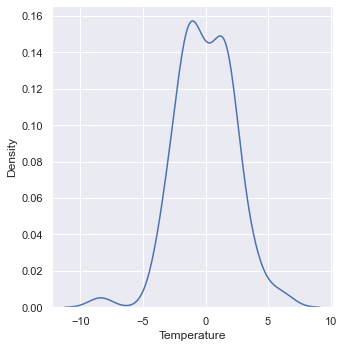

In [116]:
## Distribution of residual are Approximately Normal Distribution
sns.displot(residuals, kind ="kde")

# Observation

Here the Distribution is Little Left Skewed

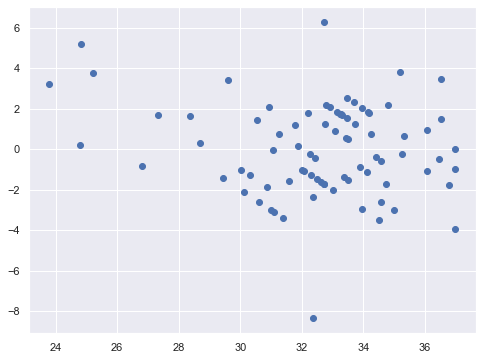

In [117]:
## Scatter Plot with predictions and residual
### Uniform Distributions
plt.scatter(reg_pred, residuals)    ## Uniform Distributions :- Model is in Uniforms.

# Performance Metrics

In [118]:
## Performance Metrics

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print(mean_squared_error(Y_test, reg_pred))
print(mean_absolute_error(Y_test,reg_pred))
print(np.sqrt(mean_squared_error(Y_test, reg_pred)))

5.199575881104849
1.8282040182595607
2.2802578540824827


# R Squared and Adjusted R-Squared

In [119]:
## R Squared
from sklearn.metrics import r2_score
score=r2_score(Y_test,reg_pred)
print(score)

0.5159015558971348


In [120]:
## Adjusted R square
#display adjusted R-squared
1 - (1-score)*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1)

0.4621128398857054

# Ridge Regression Model Prediction

In [126]:
## Ridge Regression 
from sklearn.linear_model import Ridge

In [131]:
ridge = Ridge()

In [132]:
ridge

Ridge()

In [133]:
ridge.fit(X_train,Y_train)

Ridge()

# Print the coefficients and the intercept

In [134]:
## print the coefficients
print(ridge.coef_)

[-1.04932886 -0.47029401  0.08545865  1.77827403  0.15276581  0.17388586
  0.21977498 -0.24005732]


In [135]:
## print the intercept
print(ridge.intercept_)


31.98159509202454


In [137]:
## Prediction for the Test data
ridge_pred = ridge.predict(X_test)

In [138]:
ridge_pred

array([33.00212697, 34.1137824 , 33.8879223 , 32.80341017, 36.51568241,
       32.68804806, 35.19356487, 27.37118636, 30.97359274, 29.59208532,
       29.4150637 , 33.39026671, 33.91124675, 33.44804211, 34.19125629,
       32.20003477, 36.98306124, 25.30037452, 32.25989568, 33.50553302,
       30.90085351, 28.38456091, 34.98843863, 28.71282758, 36.52507912,
       26.86914109, 32.70982538, 33.26815015, 32.90420468, 34.58587507,
       34.50795022, 31.55466359, 32.62283999, 33.31693021, 32.67961981,
       33.35697339, 30.27785966, 34.25861991, 31.73422244, 23.87443546,
       33.47287743, 33.74181292, 32.45768038, 24.89956394, 36.06658122,
       32.43669529, 31.26506116, 30.55000599, 35.26265866, 34.58694412,
       36.98622089, 30.87528415, 31.06420278, 34.39193789, 33.68709885,
       32.29094146, 37.00619342, 32.33676647, 30.12721002, 36.46744708,
       33.08675782, 30.02833748, 33.96737025, 32.01433068, 31.84209262,
       24.83587768, 33.1439239 , 30.60459539, 36.78271896, 34.82

# Assumptions of Ridge Regression:-

Text(0, 0.5, 'Test Predicted Data')

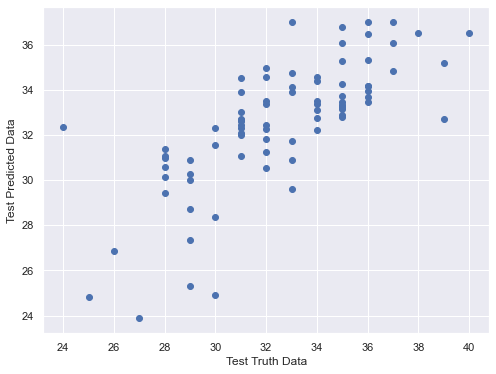

In [139]:
## Relationship Between Real Data & Predicted Data.
plt.scatter(Y_test,ridge_pred)    ## IF we get Linear Manner , it is good Linear Model.
plt.xlabel("Test Truth Data")
plt.ylabel("Test Predicted Data")

In [140]:
##  Calculating residuals:-
residuals=Y_test- ridge_pred

In [141]:
residuals

24    -2.002127
6     -1.113782
153   -0.887922
211    2.196590
198    3.484318
         ...   
180    0.493825
5     -1.085262
56     0.679823
125   -2.324977
148    1.850187
Name: Temperature, Length: 81, dtype: float64

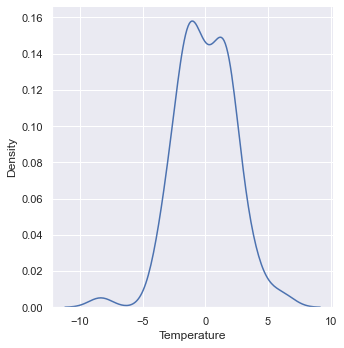

In [142]:
## Distribution of residual are Approximately Normal Distribution
sns.displot(residuals,kind="kde")

# Observation

Here, Distribution is little Left Skewed.

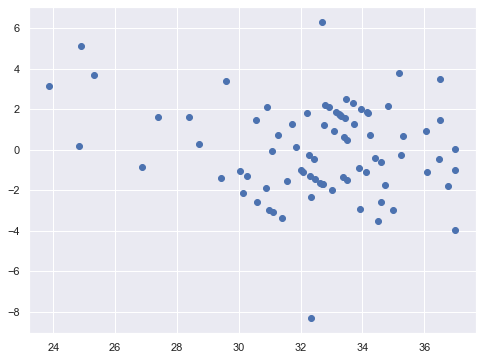

In [143]:
## SCatter plot with predictions and residual
##uniform distribution
plt.scatter(ridge_pred,residuals)

# Performance Metrics

In [144]:
## Performance Metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(Y_test,ridge_pred))
print(mean_absolute_error(Y_test,ridge_pred))
print(np.sqrt(mean_squared_error(Y_test,ridge_pred)))

5.166866801524504
1.8238419687139973
2.273074306203936


# R Squared and Adjusted R Squared


In [145]:
## R Squared
from sklearn.metrics import r2_score
score=r2_score(Y_test,ridge_pred)
print(score)

0.5189468839959945


In [146]:
## Adjusted R square
#display adjusted R-squared
1 - (1-score)*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1)

0.4654965377733272

# Lasso Regression Model Prediction

In [147]:
## Lasso Regression
from sklearn.linear_model import Lasso

In [148]:
lasso = Lasso()
lasso

Lasso()

In [149]:
lasso.fit(X_train,Y_train)

Lasso()

# Print the coefficients and the intercept

In [150]:
## print the coefficients
print(lasso.coef_)

[-0.62324302 -0.         -0.          1.25581509  0.          0.
  0.          0.        ]


In [151]:
## print the Intercept
print(lasso.intercept_)

31.98159509202454


In [152]:
## Prediction for the Test data
lasso_pred = lasso.predict(X_test)

In [153]:
lasso_pred 

array([32.78381104, 33.3358205 , 33.53835729, 32.69192045, 34.21212444,
       31.67725854, 34.06518855, 28.84685412, 30.99078013, 30.10392027,
       31.06631475, 32.42020469, 32.80398907, 32.31726957, 33.37068778,
       32.46976122, 34.57875298, 27.38502889, 32.29240264, 33.12192792,
       31.62499111, 29.79900395, 33.65042591, 30.31559056, 34.62053146,
       28.73534108, 32.5527626 , 32.85187888, 32.99739235, 33.91411932,
       33.25917474, 31.27076256, 32.79238897, 32.82670067, 32.58151856,
       32.71432078, 31.4254765 , 33.30564213, 31.04995877, 28.31033379,
       32.79596672, 32.94981382, 32.61305239, 27.48796401, 34.24588058,
       32.5549849 , 31.88399562, 30.89031162, 34.19107957, 33.50571231,
       34.39861652, 31.81203876, 31.79074958, 32.97252542, 33.46393383,
       32.11393291, 34.88311373, 32.60669677, 31.06489233, 34.43070593,
       33.14932842, 31.16313854, 33.31119788, 32.23069043, 32.12966634,
       27.92377153, 33.05552681, 31.68837004, 34.34770454, 34.11

# Assumptions of Lasso Regression:-

Text(0, 0.5, 'Test Predicted Data')

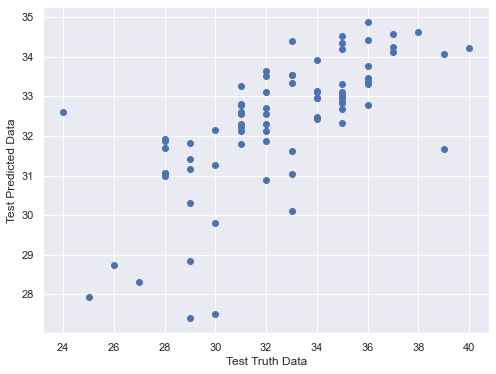

In [154]:
## Relationship Between Real Data & Predicted Data.
plt.scatter(Y_test,lasso_pred)        ## IF we get Linear Manner , it is good Linear Model.
plt.xlabel("Test Truth Data")
plt.ylabel("Test Predicted Data")

In [155]:
## Calculating residuals
residuals=Y_test- lasso_pred
residuals

24    -1.783811
6     -0.335821
153   -0.538357
211    2.308080
198    5.787876
         ...   
180    0.884428
5     -1.305114
56     2.230039
125   -2.157622
148    2.629312
Name: Temperature, Length: 81, dtype: float64

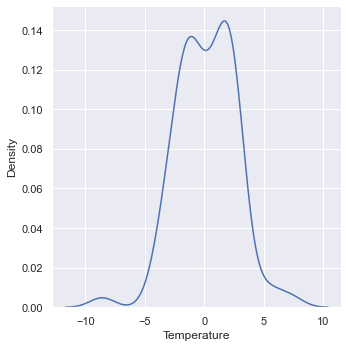

In [156]:
## Distribution of residual are Approximately Normal Distribution
sns.displot(residuals,kind="kde")

# Observation

Here, Distribution is Left Skewed Distribution

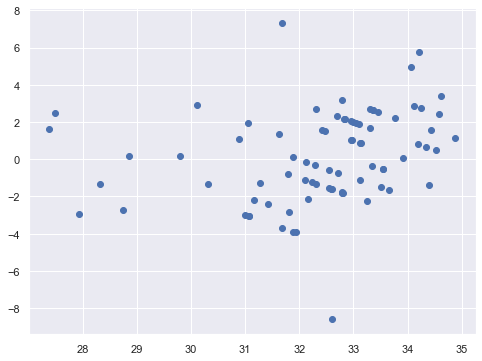

In [157]:
## SCatter plot with predictions and residual
##uniform distribution

plt.scatter(lasso_pred,residuals)

# Performance Metrics

In [158]:
## Performance Metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(Y_test, lasso_pred))
print(mean_absolute_error(Y_test, lasso_pred))
print(np.sqrt(mean_squared_error(Y_test, lasso_pred)))

6.085458745527471
1.9978776414662665
2.4668722596696147


# R Squared and Adjusted R Squared

In [159]:
## R Squared
from sklearn.metrics import r2_score
score=r2_score(Y_test, lasso_pred)
print(score)

0.4334228064508907


In [160]:
## Adjusted R square
#display adjusted R-squared
1 - (1-score)*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1)

0.37046978494543414

# Elastic Net Regression Model Prediction

In [161]:
## Elastic Net Regression
from sklearn.linear_model import ElasticNet
elastic = ElasticNet()
elastic

ElasticNet()

In [162]:
elastic.fit(X_train, Y_train)

ElasticNet()

# Print the coefficients and the intercept

In [163]:
## ## print the coefficients
print(elastic.coef_)

[-0.70146045 -0.09868324 -0.00938356  0.85954701  0.13673505  0.27669263
  0.0584842   0.09336198]


In [164]:
## print the Intercepts
print(elastic.intercept_)

31.98159509202454


In [165]:
## Prediction for the Test data
elastic_pred = elastic.predict(X_test)

In [166]:
elastic_pred

array([32.70242567, 33.31101947, 33.44376688, 32.68922196, 34.66029486,
       31.61340395, 34.21891986, 28.9987885 , 30.752409  , 30.09138053,
       30.44455594, 32.28514683, 32.51339005, 32.15159258, 33.74900272,
       32.28106799, 35.46194311, 27.84552084, 32.13484344, 32.98789745,
       31.03355133, 29.64646701, 33.72048299, 30.1058646 , 35.27961342,
       28.85882302, 32.42097701, 32.8573114 , 32.77418762, 34.14299732,
       33.35161847, 31.20464562, 32.7164606 , 33.01436975, 32.13810511,
       32.43703959, 30.84650907, 33.35371173, 31.03498886, 27.97873102,
       32.84813048, 32.87794382, 32.23021086, 27.79703997, 34.66761513,
       32.41194503, 31.71392525, 30.75588479, 34.33376897, 33.61014358,
       35.45922981, 31.43259344, 31.58757743, 33.50277522, 33.56581561,
       32.30040204, 35.89302165, 32.04419612, 30.85303736, 34.86616792,
       33.08379086, 30.81430734, 33.46795997, 31.98427893, 31.74980034,
       27.96004347, 32.9927962 , 31.3721508 , 35.23815785, 34.41

# Assumptions of ElasticNet Regression:-

Text(0, 0.5, 'Test Predicted Data')

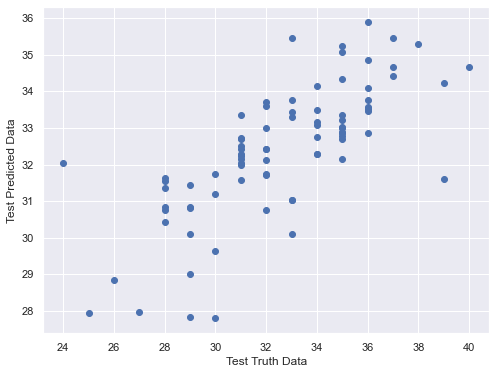

In [167]:
## Relation Between Real Data and Predicted Data
plt.scatter(Y_test,elastic_pred)     ## IF we get Linear Manner , it is good Linear Model.
plt.xlabel("Test Truth Data")
plt.ylabel("Test Predicted Data")

In [168]:
## Calculating residuals
residuals=Y_test- elastic_pred
residuals

24    -1.702426
6     -0.311019
153   -0.443767
211    2.310778
198    5.339705
         ...   
180    0.838854
5     -1.046592
56     1.919738
125   -1.742802
148    2.492490
Name: Temperature, Length: 81, dtype: float64

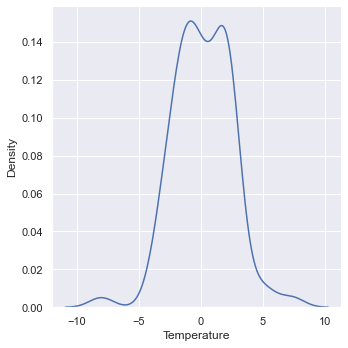

In [169]:
## Distribution of residual are Approximately Normal Distribution
sns.displot(residuals,kind="kde")

# Observation

Here, Distribution is Little Left Skewed.

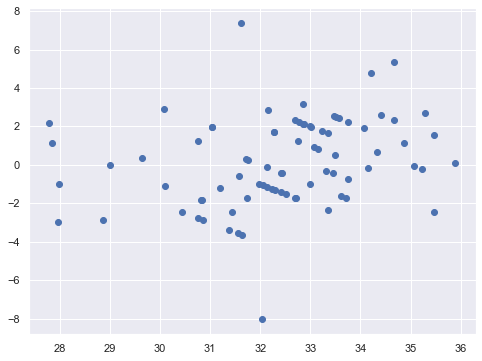

In [170]:
## SCatter plot with predictions and residual
##uniform distribution
plt.scatter(elastic_pred,residuals)

# Performance Metrics

In [171]:
## Performance Metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(Y_test,elastic_pred))
print(mean_absolute_error(Y_test,elastic_pred))
print(np.sqrt(mean_squared_error(Y_test,elastic_pred)))

5.4080056796099685
1.852351883529358
2.3255119177527277


# R Squared and Adjusted R Squared

In [172]:
## R Squared
from sklearn.metrics import r2_score
score=r2_score(Y_test,elastic_pred)
print(score)

0.4964960229328651


In [173]:
## Adjusted R square
#display adjusted R-squared
1 - (1-score)*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1)

0.44055113659207235